In [19]:
import numpy as np
import matplotlib . pyplot as plt
import random
random . seed (0) # please do not remove this line
%matplotlib inline
def load_data_from_file(fileName = "/content/advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
   # Add a column of ones to account for the bias term
  features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))

  return features_X, sales_Y

features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [20]:
_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

(200,)


In [21]:
def create_individual(n=4, bound=10):
    individual = []
    for _ in range(n):
        gene = random.uniform(-bound/2, bound/2)
        individual.append(gene)
    return individual

individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [22]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

# Test the function
features_X, sales_Y = load_data_from_file()

individual = [4.09, 4.82, 3.10, 4.02]  # Now includes 4 elements
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [24]:
import random

def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random() < crossover_rate:
        # Chọn một điểm cắt ngẫu nhiên
        point = random.randint(1, len(individual1) - 1)

        # Thực hiện trao đổi gene
        individual1_new[point:], individual2_new[point:] = individual2[point:], individual1[point:]

    return individual1_new, individual2_new

# Ví dụ sử dụng
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
new_ind1, new_ind2 = crossover(individual1, individual2)
print(new_ind1, new_ind2)

[4.09, 4.82, 3.1, 4.02] [3.44, 2.57, -0.79, -2.41]


In [25]:
import random

def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            # Apply mutation: add a small random value
            individual_m[i] += random.uniform(-1.0, 1.0)

    return individual_m

# Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [26]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [27]:
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if index2 != index1:
            break

    # Select the better individual
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [28]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness, reverse=True)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome:", sorted_population[m-1])

    new_population = []
    while len(new_population) < m - elitism:
        # Selection
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # Crossover
        offspring1, offspring2 = crossover(parent1, parent2)

        # Mutation
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)

        new_population.extend([offspring1, offspring2])

    # Copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[:elitism]:
        new_population.append(ind)

    return new_population[:m], compute_loss(sorted_population[m-1])

# Example functions for compute_fitness and compute_loss
def compute_fitness(individual):
    # Dummy fitness function
    return sum(individual)

def compute_loss(individual):
    # Dummy loss function
    return 1 / (compute_fitness(individual) + 1)

# Example usage
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 0.2624671916010499 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [29]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []

    for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(best_loss)

    return losses_list

Best loss: -0.0654781631196151 with chromosome: [-3.967430240300156, -3.965126628214782, -4.7586825719214465, -3.5810277148472203]
Best loss: -0.06175303574617414 with chromosome: [-3.967430240300156, -3.965126628214782, -4.7586825719214465, -4.502296438679555]
Best loss: -0.06355356679611367 with chromosome: [-4.399474524838057, -3.89243263096128, -4.147407633405107, -4.295443311912085]
Best loss: -0.060099723545948114 with chromosome: [-4.702774917684232, -3.644438846485125, -4.928699423342423, -4.363098458448102]
Best loss: -0.05846070355126903 with chromosome: [-4.428354535740406, -4.175834594622684, -3.8384789510908126, -5.662839366348487]
Best loss: -0.050476668088289274 with chromosome: [-4.702774917684232, -5.085252936308475, -4.377352510827076, -6.6457529344480974]
Best loss: -0.052271315740890376 with chromosome: [-5.69440132426807, -5.085252936308475, -4.377352510827076, -4.973944608450934]
Best loss: -0.052271315740890376 with chromosome: [-5.69440132426807, -5.085252936308

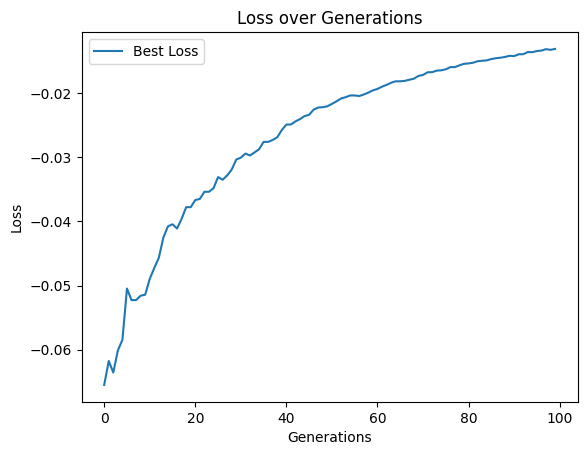

In [30]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, label='Best Loss')
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.title('Loss over Generations')
    plt.legend()
    plt.show()

# Run the genetic algorithm and visualize the results
losses_list = run_GA()
visualize_loss(losses_list)

[3.691058971899981, 4.839174274863954, 3.1299337291490783, 4.50387259774762]


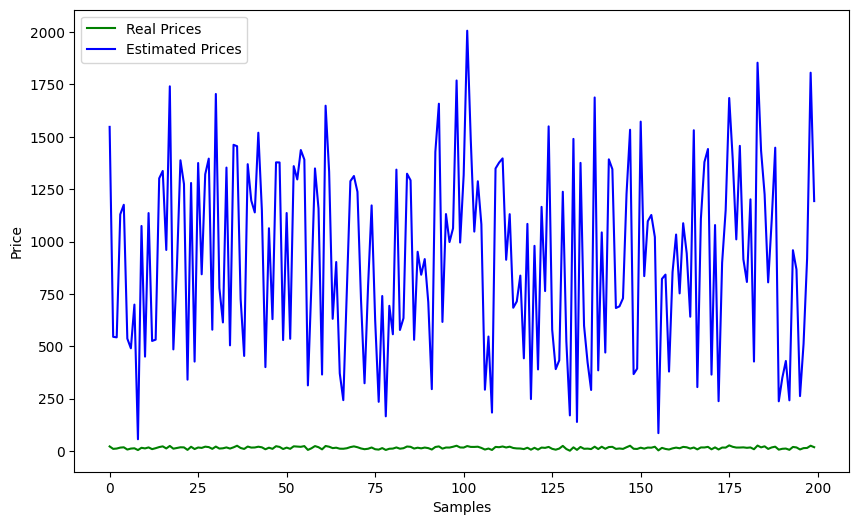

In [31]:
def visualize_predict_gt():
    # Visualization of ground truth and predicted values
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        # Calculate the estimated price using the dot product
        estimated_price = np.dot(feature, theta)
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

# Example usage
features_X, sales_Y = load_data_from_file()
population = initializePopulation(600)
visualize_predict_gt()